One of the more popular characteristics of Word Embeddings is that it affords a way to look at the similarity between words.

Canonically, the [GloVe embedding](https://nlp.stanford.edu/projects/glove/) boasts the ability to serve up words in similar feature space and demonstrate that they have similar meaning.

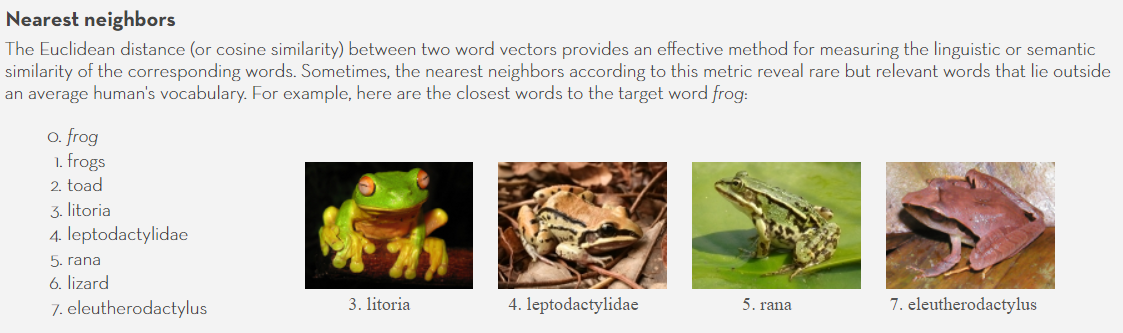

In [1]:
from IPython.display import Image

Image('images/glove_nearest.PNG')

The above merely considers the straight-line distance between two points, but **cosine similarity** [has been a shown to be a more effective similarity measure](https://cmry.github.io/notes/euclidean-v-cosine) when working with text data. Mathematically, we can represent this with

$sim(u, v) = \frac{u^Tv}{\Vert{u}\Vert_2 \Vert{v}\Vert_2 }$

Or we could import it for simple use from `sklearn`

In [2]:
from sklearn.metrics.pairwise import cosine_similarity

### Composability

Finally, a characteristic of a good Word Embedding matrix is the ability to do "word math" with words in your vocabulary. One of the more canonical examples of this is

    man - woman ~ king - queen
    
This is because, all things equal, the only difference between each pair of words should be on one "gender" axis.

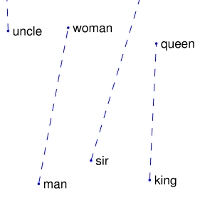

In [3]:
Image('images/man_woman_small.jpg')

As an extension of this, we can create a fun word analogy calculator (borrowed from Andrew Ng's 5th Deep Learning Coursera course) that gets the cosine similarity between two words, then finds the partner word for a third input that closest-resembles the relationship of the first two.

In [4]:
def complete_analogy(word_a, word_b, word_c, word_to_vec_map):
    """
    Performs the word analogy task as explained above: a is to b as c is to ____. 
    
    Arguments:
    word_a -- a word, string
    word_b -- a word, string
    word_c -- a word, string
    word_to_vec_map -- dictionary that maps words to their corresponding vectors. 
    
    Returns:
    best_word --  the word such that v_b - v_a is close to v_best_word - v_c, as measured by cosine similarity
    """

    word_a, word_b, word_c = word_a.lower(), word_b.lower(), word_c.lower()
    
    e_a = word_to_vec_map[word_a]
    e_b = word_to_vec_map[word_b]
    e_c = word_to_vec_map[word_c]
    
    words = word_to_vec_map.keys()
    max_cosine_sim = -100
    best_word = None

    vec = e_b - e_a
    
    for w in words:        
        if w in [word_a, word_b, word_c] :
            continue
        
        attempt = word_to_vec_map[w] - e_c
        cosine_sim = cosine_similarity(vec, attempt)
        
        if cosine_sim > max_cosine_sim:
            max_cosine_sim = cosine_sim
            best_word = w
        
    return best_word